**Universidade Estadual de Campinas - Unicamp**

**Faculdade de Tecnologia - FT**

**Autor:** Ulisses Martins Dias

**Disciplina:** TT003 - Tópicos em Computação e Informática III

**Atividade 06:** O Martelo do Thor

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ulissesdias/tt003/blob/main/atividades/atividade06.ipynb)

# Ambiente do Problema

Em sala de aula, vimos o  cenário de um Grid $4 \times 4$ em que o objetivo do agente, um ratinho, era sair de um labirinto o mais rápido possível.

Vamos agora ver um segundo cenário em que um agente, o grande e poderoso Thor, precisa buscar o seu martelo.

O ambiente onde estão Thor e o seu martelo  é mostrado abaixo:

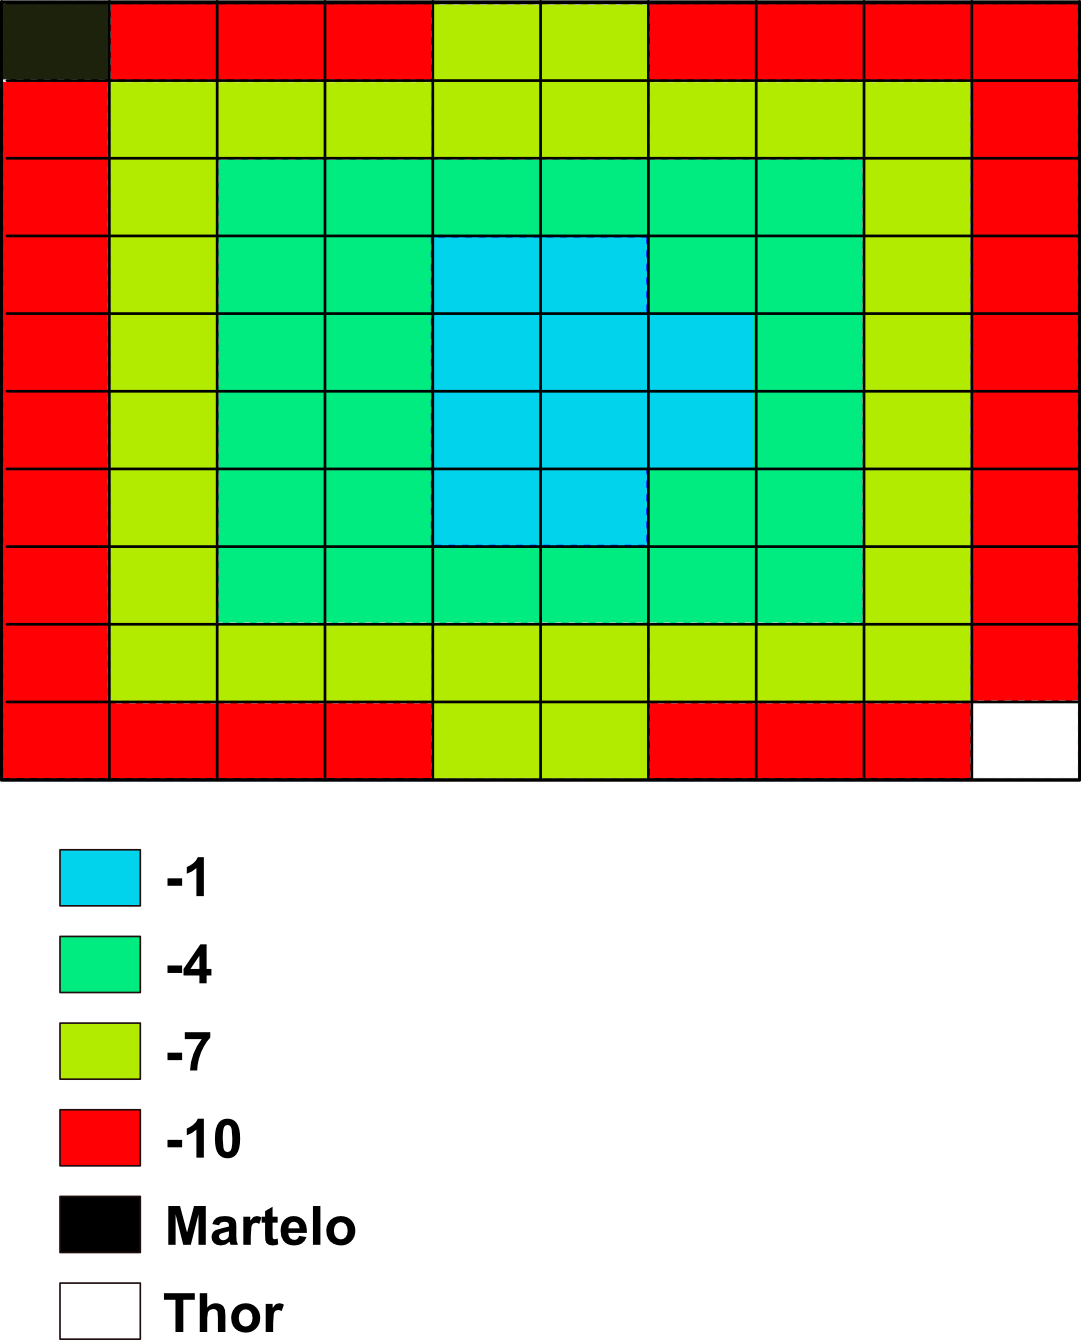

Observe que o grande e poderoso Thor está parado no canto inferior direito e o ambiente que precisa percorrer até chegar no seu martelo lhe consumirá bastante energia. Algumas células irão lhe consumir -10, enquanto que outras lhe consumirão -7, -4 ou -1.

Obviamente que Thor é um sujeito esperto e irá tentar obter o seu martelo com o mínimo de gasto de energia. Entretanto, ele precisará de um mapa para chegar onde precisa ir, ou talvez podemos chamar o mapa de oráculo.

O mapa (ou oráculo) que Thor precisa é, na verdade, uma política que lhe diga, em cada célula do Grid, a ação que ele precisa tomar. A sua função é encontrar essa política usando o que aprendeu em sala de aula. Use a técnica de programação dinâmica pareada com o *bootstrapping* para chegar em uma boa política.

In [19]:
## Efetuando o download do código da biblioteca
!wget https://www.ic.unicamp.br/~udias/si202/grid_world.py

## Importando a biblioteca
import grid_world as gw

--2023-11-29 15:23:20--  https://www.ic.unicamp.br/~udias/si202/grid_world.py
Resolving www.ic.unicamp.br (www.ic.unicamp.br)... 143.106.7.54, 2801:8a:40c0:cafe::54
Connecting to www.ic.unicamp.br (www.ic.unicamp.br)|143.106.7.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2692 (2.6K)
Saving to: ‘grid_world.py.3’

grid_world.py.3     100%[===================>]   2.63K  --.-KB/s    in 0s      

2023-11-29 15:23:21 (136 MB/s) - ‘grid_world.py.3’ saved [2692/2692]



In [20]:
rewards = [
    [100, -10, -10, -10, -7, -7, -10, -10, -10, -10],
    [-10, -7, -7, -7, -7, -7, -7, -7, -7, -10],
    [-10, -7, -4, -4, -4, -4, -4, -4, -7, -10],
    [-10, -7, -4, -4, -1, -1, -4, -4, -7, -10],
    [-10, -7, -4, -4, -1, -1, -1, -4, -7, -10],
    [-10, -7, -4, -4, -1, -1, -1, -4, -7, -10],
    [-10, -7, -4, -4, -1, -1, -4, -4, -7, -10],
    [-10, -7, -4, -4, -4, -4, -4, -4, -7, -10],
    [-10, -7, -7, -7, -7, -7, -7, -7, -7, -10],
    [-10, -10, -10, -10, -7, -7, -10, -10, -10, -10]
]

policy_cell   = [0.25, 0.25, 0.25, 0.25] # cima, direita, baixo e esquerda.
policy_array  = [[policy_cell for i in range(10)] for j in range(10)]

policy_array[0][0] = [0.00, 0.00, 0.00, 0.00]
# policy_array[9][9] = [0.00, 0.00, 0.00, 0.00]

gamma   = .7

def move_up(state) :
  a, b = state
  a -= 1
  if a < 0:
    a = 0
  return (a,b)

def move_right(state) :
  a, b = state
  b += 1
  if b > 9:
    b = 9
  return (a,b)

def move_down(state) :
  a, b = state
  a += 1
  if a > 9:
    a = 9
  return (a,b)

def move_left(state) :
  a, b = state
  b -= 1
  if b < 0:
    b = 0
  return (a,b)

In [21]:
def find_state_values(rewards, policy_array, gamma, steps = 10000) :
  current_values = [
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    ]


  all_values = []

  for step in range(steps) :

    next_values = [
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    ]


    ## A variável a seguir auxilia na condição de parada
    delta = 0

    ## Colocaremos o est.
    for i in range(10) : #9, -1, -1
      for j in range(10) :
        state = (i,j)

        up = move_up(state)
        rg = move_right(state)
        dw = move_down(state)
        lf = move_left(state)

        policy = policy_array[i][j]

        ## ToDo: atualize o valor usando bootstrapping.
        next_values[i][j] = (
            policy[0]*(rewards[up[0]][up[1]] + gamma  * current_values[up[0]][up[1]]) +
            policy[1]*(rewards[rg[0]][rg[1]] + gamma  * current_values[rg[0]][rg[1]]) +
            policy[2]*(rewards[dw[0]][dw[1]] + gamma  * current_values[dw[0]][dw[1]]) +
            policy[3]*(rewards[lf[0]][lf[1]] + gamma  * current_values[lf[0]][lf[1]])
        )

        ## Criamos um delta para ajudar na condição de parada.
        delta = max(delta, abs(next_values[i][j] - current_values[i][j]))

    all_values.append(current_values)

    current_values = next_values

    ## Para que não fique iterando muito, vamos adicionar um delta.
    if (delta < .001) :
      return current_values, all_values

  return current_values, all_values

state_values, all_values = find_state_values(rewards, policy_array, gamma)
for line in state_values :
  print(line)

images = []
for value in all_values :
  images.append(gw.draw_state_values(value, dim=500))
gw.display_sequence(images)


[0.0, 16.708338552685, -16.44741418291685, -23.214227332132797, -23.776870672014653, -24.359819830867284, -26.189375731531964, -28.17278848109863, -29.649701451795593, -31.3759338914705]
[16.607378365198635, -9.071571323381246, -18.176626980075405, -20.645094530866267, -20.23387144326728, -20.59013714290119, -22.36335663940146, -24.121734585840535, -27.374821548674703, -29.75021847034749]
[-16.92337768131849, -18.406832036627634, -17.70439548090657, -16.349668341186543, -14.8984302236667, -14.989571718280462, -16.892538775180036, -19.930892417049208, -24.33796649448994, -28.64670526666612]
[-25.12691210852674, -21.4846025055595, -16.808607257255666, -13.038435955810495, -10.706438427095808, -10.41942236278297, -12.10531403724661, -17.11334175686962, -23.125152147609295, -28.106961452759247]
[-27.192664613023254, -22.429259507875035, -16.68144568420877, -12.07195260697206, -8.540500073014277, -7.455574813380588, -10.4653835068755, -15.48965469565091, -22.58889615929334, -27.878754369842

interactive(children=(IntSlider(value=12, description='frame', max=25), Output()), _dom_classes=('widget-inter…

<function grid_world.display_sequence.<locals>._show(frame=(0, 25))>

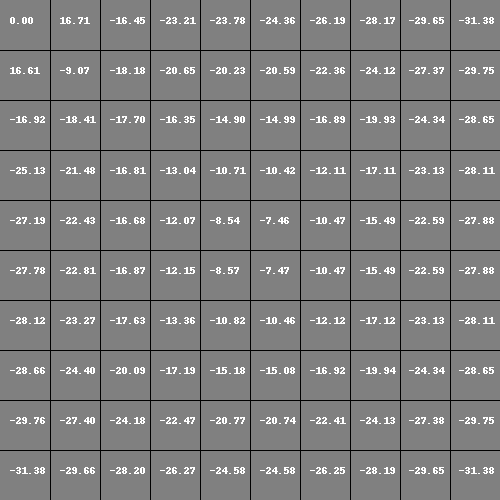

------------------------


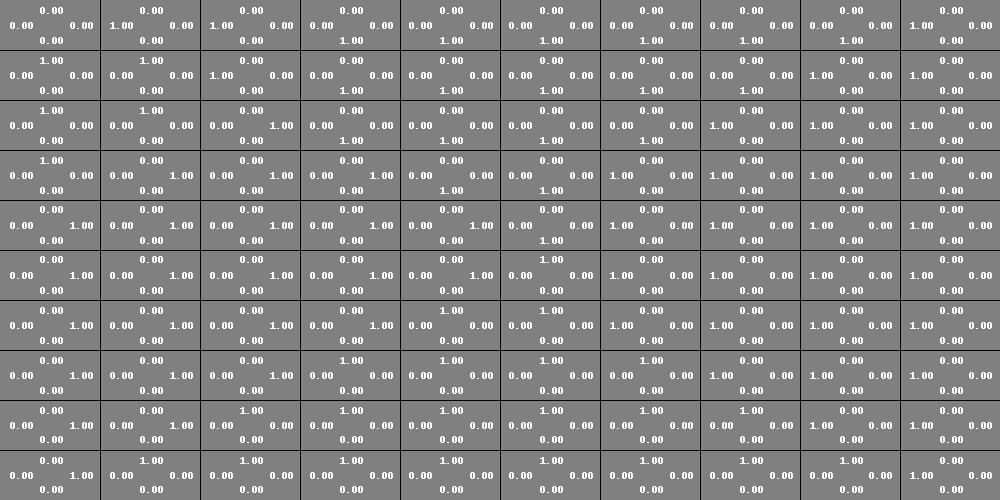

In [22]:
def find_greedy_policy(state_values, rewards, gamma) :
  policy_array  = [[ [0,0,0,0] for i in range(10)] for j in range(10)]

  for i in range(9, -1, -1) :
    for j in range(9, -1, -1) :

      ## Inicialmente, vamos descartar os estados finais.
      if (i == j == 0) :
          continue
    #   if (i == j == 9) :
    #       continue

      state = (i,j)

      up = move_up(state)
      rg = move_right(state)
      dw = move_down(state)
      lf = move_left(state)

      best_state = max( (
          rewards[up[0]][up[1]] + gamma*state_values[up[0]][up[1]],
          rewards[rg[0]][rg[1]] + gamma*state_values[rg[0]][rg[1]],
          rewards[dw[0]][dw[1]] + gamma*state_values[dw[0]][dw[1]],
          rewards[lf[0]][lf[1]] + gamma*state_values[lf[0]][lf[1]]
        )
      )

      ## Criando um array para facilitar o algoritmo
      neighbors = [ up, rg, dw, lf ]

      ## Computando o número de empates para criar uma política estocástica
      ties = 0
      for neighbor in neighbors :
        if rewards[neighbor[0]][neighbor[1]] + gamma*state_values[neighbor[0]][neighbor[1]] == best_state :
          ties += 1
      prob = 1.0/ties

      ## Verificando quem possui valor igual ao melhor
      for k in range(4) :
        neighbor  = neighbors[k]
        if rewards[neighbor[0]][neighbor[1]] + gamma*state_values[neighbor[0]][neighbor[1]] == best_state :
          policy_array[i][j][k] = 1.0/ties
  return policy_array

policy = find_greedy_policy(state_values, rewards, gamma)

display(gw.draw_state_values(state_values, dim=500))
print("------------------------")
display(gw.draw_policy(policy, dim=500))

In [23]:
## Resumo inicial
def find_optimal_policy(rewards, gamma, evaluation_steps = 100000) :
    policy_cell = [0.25, 0.25, 0.25, 0.25] # Primeira política
    policy     = [[policy_cell for i in range(10)] for j in range(10)]
    policy[0][0] = [0.00, 0.00, 0.00, 0.00]
    # policy[9][9] = [0.00, 0.00, 0.00, 0.00]

    ## Vamos guardar todas as políticas neste array.
    all_policies = []

    ## Vamos guardar todos os state-values neste array.
    all_states   = []

    while True :
       state_values, all_values = find_state_values(rewards, policy, gamma, steps = evaluation_steps)
       new_policy      = find_greedy_policy(state_values, rewards, gamma)

       if policy == new_policy :
          return policy, all_policies, all_states

       all_policies.append(policy)
       all_states.append(state_values)

       policy = new_policy

####
rewards = [
    [100, -10, -10, -10, -7, -7, -10, -10, -10, -10],
    [-10, -7, -7, -7, -7, -7, -7, -7, -7, -10],
    [-10, -7, -4, -4, -4, -4, -4, -4, -7, -10],
    [-10, -7, -4, -4, -1, -1, -4, -4, -7, -10],
    [-10, -7, -4, -4, -1, -1, -1, -4, -7, -10],
    [-10, -7, -4, -4, -1, -1, -1, -4, -7, -10],
    [-10, -7, -4, -4, -1, -1, -4, -4, -7, -10],
    [-10, -7, -4, -4, -4, -4, -4, -4, -7, -10],
    [-10, -7, -7, -7, -7, -7, -7, -7, -7, -10],
    [-10, -10, -10, -10, -7, -7, -10, -10, -10, -10]
]
gamma = 0.7
optimal, all_policies, all_states = find_optimal_policy(rewards, gamma)

images = []
for value in all_states :
  images.append(gw.draw_state_values(value, dim=400))
gw.display_sequence(images)

print("-------")

images = []
for value in all_policies :
  images.append(gw.draw_policy(value, dim=400))
gw.display_sequence(images)

interactive(children=(IntSlider(value=3, description='frame', max=6), Output()), _dom_classes=('widget-interac…

-------


interactive(children=(IntSlider(value=3, description='frame', max=6), Output()), _dom_classes=('widget-interac…

<function grid_world.display_sequence.<locals>._show(frame=(0, 6))>

In [24]:
rewards = [
    [100, -10, -10, -10, -7, -7, -10, -10, -10, -10],
    [-10, -7, -7, -7, -7, -7, -7, -7, -7, -10],
    [-10, -7, -4, -4, -4, -4, -4, -4, -7, -10],
    [-10, -7, -4, -4, -1, -1, -4, -4, -7, -10],
    [-10, -7, -4, -4, -1, -1, -1, -4, -7, -10],
    [-10, -7, -4, -4, -1, -1, -1, -4, -7, -10],
    [-10, -7, -4, -4, -1, -1, -4, -4, -7, -10],
    [-10, -7, -4, -4, -4, -4, -4, -4, -7, -10],
    [-10, -7, -7, -7, -7, -7, -7, -7, -7, -10],
    [-10, -10, -10, -10, -7, -7, -10, -10, -10, -10]
]
gamma = 0.7
optimal, all_policies, all_states = find_optimal_policy(rewards, gamma, evaluation_steps=20)

images = []
for value in all_states :
  images.append(gw.draw_state_values(value, dim=400))
gw.display_sequence(images)

print("-------")

images = []
for value in all_policies :
  images.append(gw.draw_policy(value, dim=400))
gw.display_sequence(images)

interactive(children=(IntSlider(value=3, description='frame', max=7), Output()), _dom_classes=('widget-interac…

-------


interactive(children=(IntSlider(value=3, description='frame', max=7), Output()), _dom_classes=('widget-interac…

<function grid_world.display_sequence.<locals>._show(frame=(0, 7))>

# Forma de Avaliação

Nesta atividade, você será avaliado por cumprir os seguintes itens.

1. Consegue computar os valores de estado para uma política inicial aleatória usando *bootstrapping* e programação dinâmica.
2. Consegue computar uma nova política a partir dos valores de estados.
3. Consegue alternar entre **evaluation** e **improvement** de modo a melhorar a política a cada iteração.
4. Consegue analisar se o algoritmo convergiu para uma política ótima.
5. Consegue apresentar, ao final do seu vídeo, uma rota que ligue Thor ao seu martelo interpretanto o que você obteve nos algoritmos.

Note que os itens de 1 a 4 serão resolvidos com código. O item 5 será uma apresenta informal em que você mostra o caminho de Thor observando a política que você mesmo encontrou.